# Clean and Analyze Employee Exit Surveys

This project uses data from the DETE (Department of Education, Training and Employment) and the TAFE (Technical and Further Education institute) of Queensland, Australia. The surveys were given to employees upon their resignation. Data was collected starting in 2014 and last updated in 2022. [Here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) is a link to the DETE survey, the TAFE survey is no longer available.

This project aims to answer the following question:

* *Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?*


### Important columns for analysis:

| dete_survey | tafe_survey | description |
| :---------: | :---------: | :---------: |
| ID | Record ID | An id used to identify the participant of the survey |
| Separation Type | Reason for ceasing employment  |The reason why the participants employment ended |
| Cease Date | CESSATION YEAR | The year or month the participants employment ended |
| DETE Start Date | N/A  | The year the participant began employment with the DETE |
| N/A | LengthofServiceOverall. Overall Length of Service at the Institute  (in years) | The length of the participant's employment (in years) |
| Age | CurrentAge. Current Age | Age of participant |
| Gender | Gender. What is your Gender?| Gender of participant |

___
### Table of Contents:
1. Explore Dataframes
2. Data Cleaning
   * 2.1 Delete and Standardize Column Labels
   * 2.2 Filter Resignation Types
   * 2.3 Verify Data
   * 2.4 Create New Column for insititute_service
   * 2.5 Identify Dissatisfied Employees
   * 2.6 Create Column to Distinguish Between Datasets
   * 2.7 Combine
   * 2.8 Remove Unnecessary Rows
   * 2.9 Clean institute_service Column
   * 2.10 Categorize institute_service_years Column
   * 2.11 Replace NaN Values in dissatisfied column
3. Initial Analysis
4. Results
5. Conclusion

***
\*This project is part of the Junior Data Analyst course through DataQuest and focuses on data cleaning, filtering and initial analysis using Python, NumPy and Pandas as well as Matplotlib.


## 1. Explore Data

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dete_survey = pd.read_csv('dete_survey.csv', na_values ='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')
print('Rows, Columns')
print(dete_survey.shape)
print('\n')
print('\n')
print(dete_survey.info())
print('\n')
print('\n')
print('First 5 Rows-dete_survey')
print(dete_survey.head())

Rows, Columns
(822, 56)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Care

After an initial glance at some information from the `dete_survey` we know that it contains 822 rows and 56 columns. Many columns are boolean, many are object and most rows contain few null values (the original dataset used 'Not Stated' for missing values, this was addressed using `(dete_survey_csv,na = 'Not Stated')` when reading in the original dataset. However, the demographic area columns seem to have a lot of missing values. Since our analysis is going to focus on dissatisfaction and employees who have resigned it looks like we may be able to delete quite a few rows later on.

Let's look at the `tafe_survey`:

In [78]:
print('Rows, Columns')
print(tafe_survey.shape)
print('\n')
print('\n')
print(tafe_survey.info())
print('\n')
print('\n')
print("First 5 rows-Tafe_survey")
print(tafe_survey.head())

Rows, Columns
(702, 72)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                      

We can see that these two surveys were set up very differently so we will have to dig deeper into both to be able to analyze the datasets efficiently.

## 2. Data Cleaning
### 2.1 Delete and Standardize Column Labels
Let's start by deleting some immediately unnecessary columns. Since we are only looking at information about resignations we can see that there are quite a few columns we can delete. Then we will standardize the columns names.

In [79]:
#Delete unnecessary columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

#Standardize column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
print(dete_survey_updated.info())

#Rename tafe_survey columns to match the updated dete_survey columns
tafe_new_column_names = {'Record ID': 'id',
                         'CESSATION YEAR':'cease_date', 
                         'Reason for ceasing employment': 'separationtype', 
                         'Gender. What is your Gender?': 'gender', 
                         'CurrentAge. Current Age': 'age', 
                         'Employment Type. Employment Type': 'employment_status',
                         'Classification. Classification': 'position',
                         'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
                         'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(tafe_new_column_names,  axis ='columns')
print('\n')
print(tafe_survey_updated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   822 non-null    int64  
 1   separationtype                       822 non-null    object 
 2   cease_date                           788 non-null    object 
 3   dete_start_date                      749 non-null    float64
 4   role_start_date                      724 non-null    float64
 5   position                             817 non-null    object 
 6   classification                       455 non-null    object 
 7   region                               717 non-null    object 
 8   business_unit                        126 non-null    object 
 9   employment_status                    817 non-null    object 
 10  career_move_to_public_sector         822 non-null    bool   
 11  career_move_to_private_sector   

Those column name changes look good. Now they are standardized and the column names are the same across both datasets. 

### 2.2 Filter Resignation Types
Since our analysis is looking specifically at employees who have resigned, we only need to look at rows where the employee resigned. The `dete_survey` contains three different 'Resignation' types and the `tafe_survey` contains one. We will see how many rows each survey has and then copy only those rows.

In [80]:
#Find counts of separation types with 'resignation'
dete_counts = dete_survey_updated['separationtype'].value_counts()
print('dete_survey_updated counts')
print(dete_counts)
tafe_counts  = tafe_survey_updated['separationtype'].value_counts()
print('\n')
print('tafe_survey_updated counts')
print(tafe_counts)

dete_survey_updated counts
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


tafe_survey_updated counts
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [81]:
#Create list of resignation types and copy
dete_resignation = ['Resignation-Other reasons', 
                    'Resignation-Other employer', 
                    'Resignation-Move overseas/interstate']
dete_resignations = dete_survey_updated.copy()[dete_survey_updated['separationtype'].isin(dete_resignation)]

tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated['separationtype']== 'Resignation']

### 2.3 Verify Data 
Next we will make sure that our data makes sense. We will do this by checking the `cease_date` and `dete_start_date` columns. We want to make sure that the `cease_date` is after the `dete_start_date` and that the `dete_start_dates` aren't too far in the past.

In [82]:
#Extract the year from cease_date column and verify that values are logical
dete_cease_years = dete_resignations['cease_date'].str.split('/').str.get(-1).astype(float)
print('dete_cease_date')
print(dete_cease_years.value_counts().sort_index())

#Verify dete_start_date column
dete_start_years = dete_resignations['dete_start_date'].value_counts().sort_index()
print('\n')
print('dete_start_date')
print(dete_start_years)

dete_cease_date
2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64


dete_start_date
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64


In [83]:
#Verify tafe_resignations cease_date column values
tafe_cease_dates = tafe_resignations['cease_date'].value_counts().sort_index()
print('tafe cease_dates')
print(tafe_cease_dates)


tafe cease_dates
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64


The values for these columns look logical. There are no crazy outliers.

### 2.4 Create New Column for `institute_service`
As a reminder,our main questions we hope to answer is:
Are employees who have worked for dete/tafe for a short time resigning due to dissatisfaction? What about employees who have worked for dete/tafe longer? 

To answer theis questions we need to know if an employees has been working for DETE/TAFE for a long or short period of time. The `tafe_resignations` dataframe already contains a column (`institute_service`) that tells gives us this information but we will need to create a new column for the `dete_resignations` dataframe. To do this we will subtract the `cease_date` column from the `dete_start_date` column.

In [84]:
#Create institute_service column in dete_resignations
dete_resignations['institute_service'] = dete_cease_years - dete_resignations['dete_start_date']
print(dete_resignations['institute_service'].value_counts().sort_index())

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64


Now we can clearly see how many employees were with DETE and for how long before they resigned. 

### 2.5 Identify Dissatisfied Employees
We want to know if employees are resigning due to dissatisfaction so we need to identify the columns that correspond with dissatisfaction.

For tafe these are:
* `Contributing Factors. Dissatisfaction`
* `Contributing Factors. Job Dissatisfaction`

For dete these are:
* `job_dissatisfaction`
* `dissatisfactioon_with_the_department`
* `physical_work_environment`
* `lack_of_recognition`
* `lack_of_job_security`
* `work_location`
* `employment_conditions`
* `work_life_balance`
* `workload`

If an employee indicated that any of the above factors caused them to resign then we will consider them 'dissatisfied' in a new column. First we  will standardize the `tafe_resignations` columns so they align with the `dete_resignations` columns.

In [85]:
#What values are present in columns related to dissatisfaction?
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna = False))
print('\n')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna = False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


We want to convert the values to True or False so we will consider the value `'-'` as False. Next we need to write a function that will convert these values to True or False.

In [86]:
#Create a function that returns True or False
def update_vals(value):
    if pd.isna(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True

#Convert tafe_resignations columns related to dissatisfaction and assign to new column (dissatisfied)
tafe_dissatisfaction_cols = ['Contributing Factors. Dissatisfaction',
                             'Contributing Factors. Job Dissatisfaction']

tafe_resignations['dissatisfied'] = tafe_resignations[tafe_dissatisfaction_cols].applymap(update_vals).any(1, skipna = False)
tafe_resignations_updated = tafe_resignations.copy()

#Verify we converted correctly
print(tafe_resignations_updated['dissatisfied'].value_counts(dropna = False))


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64


In [87]:
#The dete_resignation columns related to dissatisfaction did not contain values such as '-'
#They do not require a function
dete_dissatisfied_cols = ['job_dissatisfaction',
                          'dissatisfaction_with_the_department',
                          'physical_work_environment',
                          'lack_of_recognition',
                          'lack_of_job_security',
                          'work_location',
                          'employment_conditions',
                          'work_life_balance',
                          'workload']

#Convert
dete_resignations['dissatisfied'] = dete_resignations[dete_dissatisfied_cols].any(1, skipna = False)
dete_resignations_updated = dete_resignations.copy()

#Verify columns were converted correctly
print(dete_resignations_updated['dissatisfied'].value_counts(dropna = False))

False    162
True     149
Name: dissatisfied, dtype: int64


### 2.6 Create Column to Distinguish Between Datasets
Let's make it easier to tell which dataset we are looking at after they are combined by creating a new column that distinguishes each row between DETE and TAFE. Then we will take a final look at our columns to verify that everything is how we want it before we combine all of the data into one dataset.

In [88]:
#Create column for each dataset
dete_resignations_updated['institute']='DETE'
tafe_resignations_updated['institute']='TAFE'

print('DETE COLUMNS')
print(dete_resignations_updated.info())
print('\n')
print('TAFE COLUMNS')
print(tafe_resignations_updated.info())

DETE COLUMNS
<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_priv

### 2.7 Combine

Now we can combine the dataframes so that the columns are merged and our data will be easier to analyze.

In [89]:
#Combine (stacked, axis = 0)
combined = pd.concat([dete_resignations_updated, tafe_resignations_updated], ignore_index = True)

#Filter unnecessary columns by df.notnull
print(combined.notnull().sum())


id                                                     651
separationtype                                         651
cease_date                                             635
dete_start_date                                        283
role_start_date                                        271
position                                               598
classification                                         161
region                                                 265
business_unit                                           32
employment_status                                      597
career_move_to_public_sector                           311
career_move_to_private_sector                          311
interpersonal_conflicts                                311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    311
physical_work_environment                              311
lack_of_recognition                                    3

### 2.8 Remove Unnecessary Rows

Now that all of our data is combined in one dataset we can see that we still have a lot of rows that are unneccesary for our analysis. We only need those that are specifically about resignations. So will delete any rows that have less than 500 `non null` values. This will leave us with a manageable number of columns that are relevant to our analysis.

In [90]:
#Delete columns that have less than 500 non null values
combined_updated = combined.dropna(axis = 1, thresh = 500)
print('final dete/tafe dataframe')
print(combined_updated.info())

final dete/tafe dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    object 
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(1), object(9)
memory usage: 51.0+ KB
None


Now we have one dataframe with 651 rows and 10 columns. This is much more manageable than what we started with. We were also able to combine rows from the separate dataframes so all of our data is under one column instead of two different columns with different names and values. This will make analysis easier and more efficient.

### 2.9 Clean `institute_service` column
We need to go back to the new column(`institute_service`) we created and clean it up a bit. This columns contains values in different forms as seen below.

In [91]:
print(combined_updated['institute_service'].value_counts().head(10))

Less than 1 year    73
1-2                 64
3-4                 63
5-6                 33
11-20               26
5.0                 23
1.0                 22
7-10                21
3.0                 20
0.0                 20
Name: institute_service, dtype: int64


We have years and ranges. To better analyze this data, we are going to convert the numbers into categories. These categories will be based on  [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) that makes the argument that it is more important to understand where an employee is at in their career stage than how many years they have been with the organization or company. The article breaks these stages into 4 modified categories:

* `New`: Less than 3 years at company
* `Experienced`: 3-6 years at company
* `Established`: 7-10 years at company
* `Veteran`: 11 or more years at company

We will apply these categories to our `institute_service` column but first we have to remove the text and ranges.

In [92]:
#Convert column to 'str'
combined_copy = combined_updated.copy()#Copied to avoid SettingWithCopyWarning
combined_copy['institute_service'] = combined_copy['institute_service'].astype(str)

#Remove/convert 'Less than' and 'More than' 
combined_copy['institute_service'] = combined_copy['institute_service'].str.replace('Less than 1 year', '1')
combined_copy['institute_service'] = combined_copy['institute_service'].str.replace('More than 20 years', '20.0')

Now we need to take care of the range values. We can take the first number of each range since the whole range will eventually go into a category. So we will extract just the first digit of the range and assign it to a new column (`institute_service_years`)and convert to a float.

In [93]:
#Extract first digit and convert to float
combined_copy['institute_service_years'] = combined_copy['institute_service'].str.extract('(\d+)').astype(float)
#Verify 
print(combined_copy['institute_service_years'].head(5))

0     7.0
1    18.0
2     3.0
3    15.0
4     3.0
Name: institute_service_years, dtype: float64


### 2.10 Categorize `institute_service_years` Column
Now we will create a function that assigns categories based on the `institute_service_years` column and then apply that function to the dataset using `series.apply()`

In [94]:
#Create a function to assign categories
def years_categories(val):
    if pd.isnull(val):
        return np.nan
    if val < 3:
        return 'New'
    if val < 7:
        return 'Experienced'
    if val < 11:
        return 'Established'
    return 'Veteran'

#Use function to apply to institute_service_years column and assign to new column(service_category)
combined_copy['service_category'] = combined_copy['institute_service_years'].apply(years_categories)
print(combined_copy['service_category'].value_counts(dropna = False))

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_category, dtype: int64


### 2.11 Replace `Nan` Values in `dissatisfied` Column
The `dissatisfied` column contained 10 NaN values so we will replace those values with the most common value: `False`

In [95]:
#Replace NaN values with most common value: False
combined_copy['dissatisfied'] = combined_copy['dissatisfied'].fillna(False)

In [96]:
print(combined_copy['dissatisfied'].value_counts(dropna = False))

False    411
True     240
Name: dissatisfied, dtype: int64


# 3. Initial Analysis
Let's first create a pivot table that shows employees who resigned due to dissatisfaction by using the `dissatisfied`  and `service_category`. This will give us a percentage and we can use this information to then create a bar chart to visualize the results.

In [97]:
#Create pivot table that shows employees who resigned due to dissatisfaction and their service categories
pivot_dissat_combined_copy = combined_copy.pivot_table(values = 'dissatisfied', index ='service_category')
print(pivot_dissat_combined_copy)

                  dissatisfied
service_category              
Established           0.516129
Experienced           0.343023
New                   0.295337
Veteran               0.485294


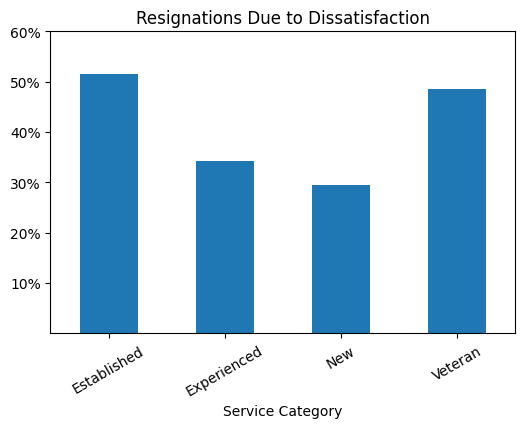

In [98]:
#Create a bar chart from pivot table to visualize data
pivot_dissat_combined=pivot_dissat_combined_copy.plot(kind='bar', title='Resignations Due to Dissatisfaction', legend = False)
plt.xlabel('Service Category')
plt.xticks(rotation=30)
plt.yticks(ticks=[0.1,0.2,0.3,0.4,0.5,0.6],
          labels=['10%','20%','30%','40%','50%','60%'])

plt.show()

# 4. Results
We can clearly see that for `'Established'` and `'Veteran'` employees, dissatisfaction accounted for around 50% of their resignations. `'New'` employees resigned due to dissatisfaction about 30% of the time and `'Experienced'` employees were in the middle at about 35%. 

# 5. Conclusion
We found that employees who had been with DETE/TAFE for 7 or more years resigned due to dissatisfaction about half the time. Employees who had been with the company less than 7 years resigned due to dissatisfaction 30%-35% of the time.

Something that may account for the resignation of long-term employees is policy changes over the years that affected benefits or compensation packages including salary.

Questions for further Analysis:
* Instead of using categories for years of service, how does the age of the employee affect the results?
* How much do other factors listed in the original surveys contribute to resignations? Does one factor affect the results more than the others or is dissatisfaction the biggest factor?